Условия лабораторной:
Вариант 7:
Федеральный округ - Сибирский ФО;
alpha = 0.01
M = 6000
(a, sigma) = (2, 1)
n = 73

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
###  see 

### https://docs.scipy.org/doc/scipy/reference/stats.html
# смотреть Hypothesis Tests and related functions

In [11]:
alpha = 0.01
a = 2
sigma = 1
n = 73
M = 6000
k_bins = 3

In [4]:
Sibir_FO = pd.read_excel("conditions.xlsx")
print('Число врачей на 10000 населения в Сибирском ФО\n\n')
print(Sibir_FO)

Число врачей на 10000 населения в Сибирском ФО


                         Регион  2005  2010  2015  2019  2020  2021
0   Сибирский федеральный округ  51.6  52.4  47.0  48.8  49.2  49.4
1              Республика Алтай  38.9  43.5  44.7  44.8  45.6  43.6
2               Республика Тыва  42.8  45.6  48.9  49.7  50.6  50.2
3            Республика Хакасия  37.8  38.1  39.0  42.3  40.1  41.2
4                Алтайский край  46.7  48.7  42.9  42.6  43.4  43.0
5             Красноярский край  50.3  53.7  47.6  49.9  50.6  49.6
6             Иркутская область  47.5  49.9  45.5  49.0  49.2  49.6
7           Кемеровская область  47.0  47.7  42.9  43.8  44.2  43.4
8        Новосибирская область   61.7  58.3  51.6  54.6  56.0  56.7
9                Омская область  55.8  53.9  50.6  50.9  51.2  51.2
10              Томская область  67.3  69.1  53.5  56.4  53.1  59.3


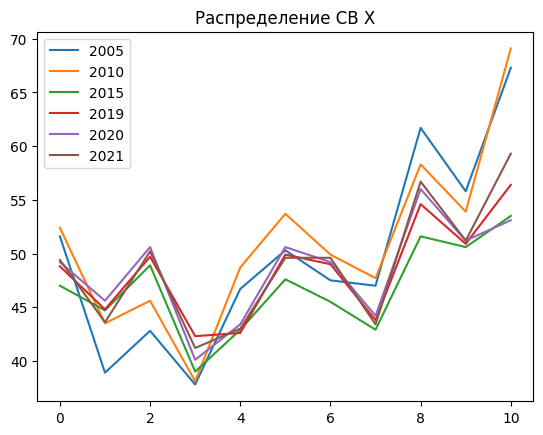

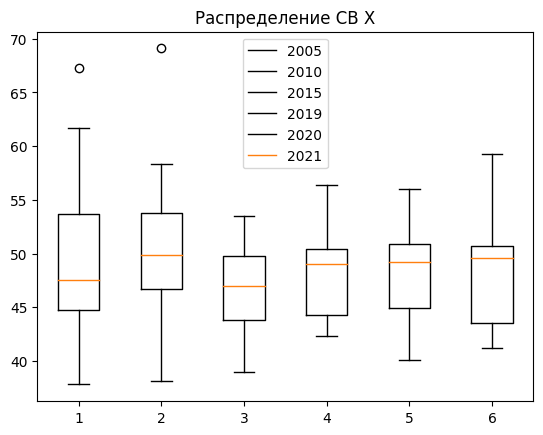

In [5]:
# Построение графика и ящика с усами
plt.plot(Sibir_FO[2005])
plt.plot(Sibir_FO[2010])
plt.plot(Sibir_FO[2015])
plt.plot(Sibir_FO[2019])
plt.plot(Sibir_FO[2020])
plt.plot(Sibir_FO[2021])
plt.legend(["2005", "2010", "2015", "2019", "2020", "2021"])
plt.title('Распределение СВ X')
plt.show()

plt.boxplot([Sibir_FO[2005], Sibir_FO[2010], Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021]])
plt.title("Распределение СВ X")
plt.legend(["2005", "2010", "2015", "2019", "2020", "2021"])
plt.show()

In [8]:
# Нахождение статистики
del Sibir_FO['Регион']
print()
print('Статистика для св X')
for column in Sibir_FO:
    print()
    print(column)
    print('Минимальное значение = ', min(Sibir_FO[column]))
    print('Максимальное значение = ', max(Sibir_FO[column]))
    print('Среднее = ', Sibir_FO[column].mean())
    print('СКО = ', Sibir_FO[column].std())
    print('Медиана = ', Sibir_FO[column].median())
    print('Квантиль уровня 0.25 = ', Sibir_FO[column].quantile(0.25))
    print('Квантиль уровня 0.5 = ', Sibir_FO[column].quantile(0.5))
    print('Квантиль уровня 0.75 = ', Sibir_FO[column].quantile(0.75))


Статистика для св X

2005
Минимальное значение =  37.8
Максимальное значение =  67.3
Среднее =  49.76363636363636
СКО =  9.065789841737203
Медиана =  47.5
Квантиль уровня 0.25 =  44.75
Квантиль уровня 0.5 =  47.5
Квантиль уровня 0.75 =  53.7

2010
Минимальное значение =  38.1
Максимальное значение =  69.1
Среднее =  50.99090909090909
СКО =  8.171713962866608
Медиана =  49.9
Квантиль уровня 0.25 =  46.650000000000006
Квантиль уровня 0.5 =  49.9
Квантиль уровня 0.75 =  53.8

2015
Минимальное значение =  39.0
Максимальное значение =  53.5
Среднее =  46.74545454545455
СКО =  4.298689017913168
Медиана =  47.0
Квантиль уровня 0.25 =  43.8
Квантиль уровня 0.5 =  47.0
Квантиль уровня 0.75 =  49.75

2019
Минимальное значение =  42.3
Максимальное значение =  56.4
Среднее =  48.43636363636363
СКО =  4.670176169540659
Медиана =  49.0
Квантиль уровня 0.25 =  44.3
Квантиль уровня 0.5 =  49.0
Квантиль уровня 0.75 =  50.4

2020
Минимальное значение =  40.1
Максимальное значение =  56.0
Среднее =  48.

In [12]:
# Проверка с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2))

# Замена всех значений NaN на 0
# Sibir_FO = Sibir_FO.fillna(0)
# print('\n\n')
# print(Sibir_FO)

# Тест Шапиро-Уилка является более мощным и точным, 
#  лучше применять его в случае, если данные имеют небольшой объем (обычно до 2000 наблюдений). 
# Тест Шапиро-Уилка также более чувствителен к отклонениям от нормальности в хвостах распределения.


print()
print('Проверка гипотезы H0 с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2)):')
for column in Sibir_FO:
    result = stats.shapiro(Sibir_FO[column])
    print()
    print(column)
    print(result)
    if result[1] > alpha:
        print('Выборка распределена по нормальному закону => ПРИНИМАЕМ H0')
    else:
        print('Выборка не распределена по норм. закону => ОТВЕРГАЕМ H0')


Проверка гипотезы H0 с помощью теста Шапиро-Уилка (H0 ~ N(a,std^2)):

2005
ShapiroResult(statistic=0.9504603147506714, pvalue=0.6498408317565918)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2010
ShapiroResult(statistic=0.9555764198303223, pvalue=0.7155753970146179)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2015
ShapiroResult(statistic=0.9852494597434998, pvalue=0.9883262515068054)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2019
ShapiroResult(statistic=0.9339833855628967, pvalue=0.4525392949581146)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2020
ShapiroResult(statistic=0.9667674899101257, pvalue=0.8521630764007568)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0

2021
ShapiroResult(statistic=0.9186110496520996, pvalue=0.30724141001701355)
Выборка распределена по нормальному закону => ПРИНИМАЕМ H0


In [13]:
# Проверка гипотезы о равенстве дисперсий для различных годов

#   БЕРЕМ ГОДА КРОМЕ ПЕРВЫХ ДВУХ    !!!!!!!!!!

# Тест Бартлетта основан на сравнении дисперсий между группами 
# для данных с нормальным распределением. 
# является более мощным и точным, чем тест Левена, но он более чувствителен к нарушениям нормальности.

# Тест Левена также используется для проверки дисперсий, но он более устойчив к нарушениям нормальности 
# в данных. может быть применен для данных с любым типом распределения. 

print('\nТест Бартлетта')
# result = stats.bartlett(Sibir_FO[2005], Sibir_FO[2010], Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
result = stats.bartlett(Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
print(result)
if result[1] > alpha:
    print('Дисперсии равны => ПРИНИМАЕМ H0')
else:
    print('Дисперсии не равны => ОТВЕРГАЕМ H0')
    

print('\nТест Левена')
result = stats.levene(Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
# result = stats.levene(Sibir_FO[2005], Sibir_FO[2010], Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
print(result)
if result[1] > alpha:
    print('Дисперсии равны => ПРИНИМАЕМ H0')
else:
    print('Дисперсии не равны => ОТВЕРГАЕМ H0')


Тест Бартлетта
BartlettResult(statistic=0.9235838426129112, pvalue=0.8197330759496372)
Дисперсии равны => ПРИНИМАЕМ H0

Тест Левена
LeveneResult(statistic=0.16373620754215895, pvalue=0.9201526708455248)
Дисперсии равны => ПРИНИМАЕМ H0


In [14]:
# Проверка гипотезы, что Xср значимо больше общероссийского значения показателя X для различных годов

# Гипотеза о равенстве средних 
# t-тест для двух выборок предполагает, что средние значения двух генеральных совокупностей равны.

print()
rus_stat = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ITOG')
print('Общероссийское значение показателя X для различных годов')
print(rus_stat)
for column in Sibir_FO:
    result = stats.ttest_1samp(Sibir_FO[column], popmean=rus_stat[column][1], alternative='less')
    print()
    print(column)
    print(result)
    if result[1] > alpha:
        print('Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0')
    else:
        print('Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0')


Общероссийское значение показателя X для различных годов
                            Итог  2005  2010  2015  2019  2020  2021
0           Российская Федерация  48.6  50.1  45.9  48.7  50.4  51.0
1  Центральный федеральный округ  50.9  53.5  46.1  49.6  53.6  54.8

2005
Ttest_1sampResult(statistic=-0.4157268007549418, pvalue=0.3431951599095764)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2010
Ttest_1sampResult(statistic=-1.0183558979378478, pvalue=0.16625682868896857)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2015
Ttest_1sampResult(statistic=0.4979961419822281, pvalue=0.6853721306815403)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2019
Ttest_1sampResult(statistic=-0.8263810765354896, pvalue=0.21393233350354723)
Xср сравнимо с общероссийским значением => ПРИНИМАЕМ H0

2020
Ttest_1sampResult(statistic=-3.642441206035078, pvalue=0.0022592427745294573)
Xср значимо больше общероссийского значения => ОТВЕРГАЕМ H0

2021
Ttest_1sampResult(statistic=-3.4

In [15]:
# Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы
print()
print('Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы')
for column1 in Sibir_FO:
    for column2 in Sibir_FO:
        if column1 != column2:
            result = stats.ttest_ind(Sibir_FO[column1], Sibir_FO[column2], alternative='less')
            print()
            print(column1, column2)
            print(result)
            if result[1] > alpha:
                print('Различия незначимы => ПРИНИМАЕМ H0')
            else:
                print(
                    'Различия значимы')


Проверка гипотезы, что различия между средними значениями показателя X в какие-то два года незначимы

2005 2010
Ttest_indResult(statistic=-0.33349908203703604, pvalue=0.3711143433074867)
Различия незначимы => ПРИНИМАЕМ H0

2005 2015
Ttest_indResult(statistic=0.9976945266396108, pvalue=0.8348268870970939)
Различия незначимы => ПРИНИМАЕМ H0

2005 2019
Ttest_indResult(statistic=0.43165993570174654, pvalue=0.6646969301307828)
Различия незначимы => ПРИНИМАЕМ H0

2005 2020
Ttest_indResult(statistic=0.4198626313584984, pvalue=0.6604690806109503)
Различия незначимы => ПРИНИМАЕМ H0

2005 2021
Ttest_indResult(statistic=0.28659827518382647, pvalue=0.6113160791394543)
Различия незначимы => ПРИНИМАЕМ H0

2010 2005
Ttest_indResult(statistic=0.33349908203703604, pvalue=0.6288856566925134)
Различия незначимы => ПРИНИМАЕМ H0

2010 2015
Ttest_indResult(statistic=1.524961880624847, pvalue=0.9285365810574304)
Различия незначимы => ПРИНИМАЕМ H0

2010 2019
Ttest_indResult(statistic=0.9001686128663581, pval

In [16]:
# Проверка значимости отличий средних в выбранной группе

# Тест Тьюки -  методов множественного сравнения, позволяет определить, 
# какие группы имеют статистически значимые различия между своими средними значениями.

print('\nПроверка значимости отличий средних в выбранной группе')
print('\nТест Тьюки')
result = stats.tukey_hsd(Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
print(result)

# Если p-value меньше или равно уровню значимости, то различия между группами 
# считаются статистически значимыми.

print('\nВЫВОД - по Тесту Тьюки различия незначимы => ПРИНИМАЕМ H0')

print('\nОдносторонний тест ANOVA')
result = stats.f_oneway(Sibir_FO[2015], Sibir_FO[2019], Sibir_FO[2020], Sibir_FO[2021])
print(result)
if result[1] > alpha:
    print('Различия незначимы  => ПРИНИМАЕМ H0')
else:
    print('Различия значимы')


Проверка значимости отличий средних в выбранной группе

Тест Тьюки
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.691     0.848    -7.262     3.880
 (0 - 2)     -1.727     0.839    -7.299     3.844
 (0 - 3)     -2.091     0.747    -7.662     3.480
 (1 - 0)      1.691     0.848    -3.880     7.262
 (1 - 2)     -0.036     1.000    -5.608     5.535
 (1 - 3)     -0.400     0.997    -5.971     5.171
 (2 - 0)      1.727     0.839    -3.844     7.299
 (2 - 1)      0.036     1.000    -5.535     5.608
 (2 - 3)     -0.364     0.998    -5.935     5.208
 (3 - 0)      2.091     0.747    -3.480     7.662
 (3 - 1)      0.400     0.997    -5.171     5.971
 (3 - 2)      0.364     0.998    -5.208     5.935


ВЫВОД - по Тесту Тьюки различия незначимы => ПРИНИМАЕМ H0

Односторонний тест ANOVA
F_onewayResult(statistic=0.40537946856992374, pvalue=0.7499357272123397)
Различия незначимы  => ПРИНИМАЕМ H0
